In [2]:
import qiskit

In [3]:
qiskit.__qiskit_version__


{'qiskit': '0.45.1', 'qiskit-aer': None, 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [4]:
from qiskit import IBMQ

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService(channel="ibm_quantum", token="7c356cb4c9269974103570d2ab916b215275b8531f36db208f9ba724f5d8327175b787ac11d25983056ce2821d7a375887b2336b940b65fcfb3dba270cb50a6f")
 

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="7c356cb4c9269974103570d2ab916b215275b8531f36db208f9ba724f5d8327175b787ac11d25983056ce2821d7a375887b2336b940b65fcfb3dba270cb50a6f", set_as_default=True)
 
# Load saved credentials
service = QiskitRuntimeService()

In [6]:
from qiskit import * 

In [7]:
qr = QuantumRegister(2)


In [8]:
cr = ClassicalRegister(2)

In [9]:
circuit = QuantumCircuit(qr,cr) 

In [10]:
%matplotlib inline

In [11]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [13]:
circuit.h(qr[0])


C:\Users\wassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


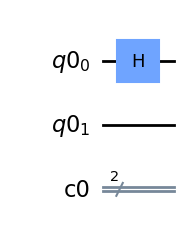

In [14]:
circuit.draw(output= 'mpl')

In [15]:
circuit.cx(qr[0], qr[1])

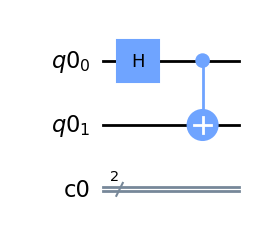

In [16]:
circuit.draw(output='mpl') 

In [17]:
circuit.measure(qr, cr) 

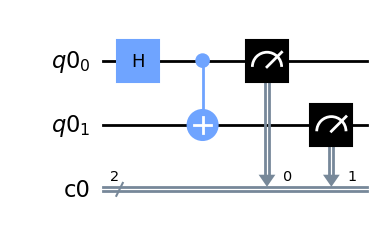

In [18]:
circuit.draw(output='mpl') 

In [20]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

#simulator = Aer.get_backend( 'qasm_simulator')  yt


In [23]:
#result = simulator.run(circ, backend = simulator).result()
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()


In [24]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

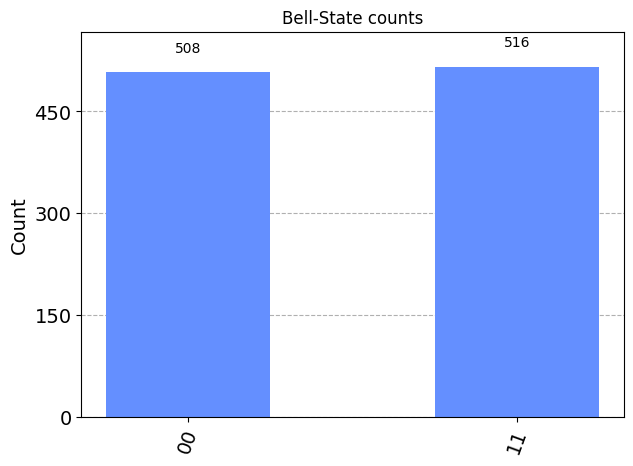

In [25]:
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [5]:
##Quantum Machine learning programming with algorithm (Pegasps Quantum Support Vector Classifier) or PegasosQSVC

In [8]:
#Let’s generate some data:
from sklearn.datasets import make_blobs

# example dataset
features, labels = make_blobs(n_samples=20, n_features=2, centers=2, random_state=3, shuffle=True)


In [9]:
#We pre-process the data to ensure compatibility with the rotation encoding and split it into the training and test datasets.
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=15, shuffle=False
)

In [10]:

# number of qubits is equal to the number of features
num_qubits = 2

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000


In [11]:
#The algorithm will run using:

#The default fidelity instantiated in FidelityQuantumKernel
#A quantum kernel created from ZFeatureMap
#
#
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [12]:
# The implementation PegasosQSVC is compatible with the scikit-learn interfaces and has a pretty standard way of training a model. In the constructor we pass parameters of the algorithm, in this case there are a regularization hyper-parameter 
#  and a number of steps.

# Then we pass training features and labels to the fit method, which trains a models and returns a fitted classifier.

# Afterwards, we score our model using test features and labels.


from qiskit_machine_learning.algorithms import PegasosQSVC

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
pegasos_qsvc.fit(train_features, train_labels)

# testing
pegasos_score = pegasos_qsvc.score(test_features, test_labels)
print(f"PegasosQSVC classification test score: {pegasos_score}")

PegasosQSVC classification test score: 1.0


In [13]:
# For visualization purposes we create a mesh grid of a predefined step that spans our minimum and maximum values we applied in MinMaxScaler.
# We also add some margin to the grid for better representation of the training and test samples.
grid_step = 0.2
margin = 0.2
grid_x, grid_y = np.meshgrid(
    np.arange(-margin, np.pi + margin, grid_step), np.arange(-margin, np.pi + margin, grid_step)
)

In [14]:
# We convert the grid to the shape compatible with the model, the shape should be (n_samples, n_features). Then for each grid point we predict a label. 
# In our case predicted labels will be used for coloring the grid.
meshgrid_features = np.column_stack((grid_x.ravel(), grid_y.ravel()))
meshgrid_colors = pegasos_qsvc.predict(meshgrid_features)

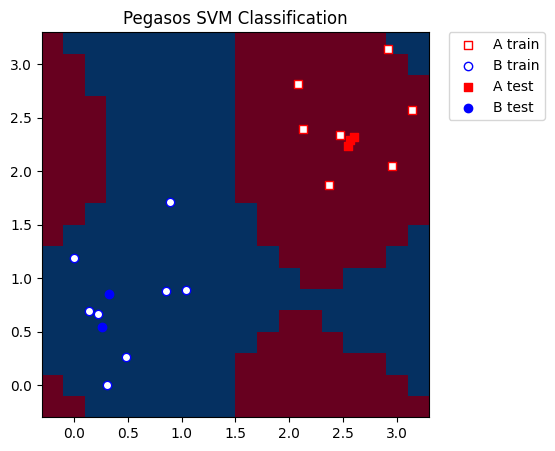

In [16]:
# Finally, we plot our grid according to the labels/colors we obtained from the model. We also plot training and test samples.
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
meshgrid_colors = meshgrid_colors.reshape(grid_x.shape)
plt.pcolormesh(grid_x, grid_y, meshgrid_colors, cmap="RdBu", shading="auto")

plt.scatter(
    train_features[:, 0][train_labels == 0],
    train_features[:, 1][train_labels == 0],
    marker="s",
    facecolors="w",
    edgecolors="r",
    label="A train",
)
plt.scatter(
    train_features[:, 0][train_labels == 1],
    train_features[:, 1][train_labels == 1],
    marker="o",
    facecolors="w",
    edgecolors="b",
    label="B train",
)

plt.scatter(
    test_features[:, 0][test_labels == 0],
    test_features[:, 1][test_labels == 0],
    marker="s",
    facecolors="r",
    edgecolors="r",
    label="A test",
)
plt.scatter(
    test_features[:, 0][test_labels == 1],
    test_features[:, 1][test_labels == 1],
    marker="o",
    facecolors="b",
    edgecolors="b",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Pegasos SVM Classification")
plt.show()